# Labwork 4

### Exercise 2

Let $X$ be the solution to $$ dX_t = rX_t \,dt + \sigma X_t\,dW_t,\qquad X_0=x,$$ where $W$ is Brownian motion. We want to evaluate the speed of convergence of $$\mathbb{E}\left[\left(\bar{X}^m_T-X_T\right)^2\right]\xrightarrow[m\to\infty]{} 0,$$
where $\bar{X}^m$ is the Euler discretization of $X.$ For the numerical experiments, we take 
$$
r=0.03, \sigma=0.2, x=100,  T=1.
$$

1. Recall the theoritical speed of convergence.

2. Illustrate it using numerical simulations, e.g., plot $$\frac{1}{m}\in\left\{2^{-1},\cdots,2^{-6}\right\}\mapsto \frac{1}{n} \sum_{i=1}^n \left(\bar{X}^{m,i}_T-X^i_T\right)^2\approx\mathbb{E}\left[\left(\bar{X}^{m}_T-X_T\right)^2\right],$$
where $n=10000$ and $(\bar{X}^{m,i}_T,X^i_T)_{i\ge 1}$ are independent copies of $(\bar{X}^{m}_T,X_T).$ What do you observe? What if $n=100$?


## Solution

1. 

2.

In [11]:

#####experiment with m,n fixed



import numpy as np
import matplotlib.pyplot as plt #library for plots
from scipy.interpolate import interp1d


r,sigma,S0,T=0.03,0.2,100,1

n=2
m=5
#a=[2,2,2,2,2,2]
#m=np.cumprod(a)
print(m)


times=np.linspace(0,T,m)
print('T',times)

dt=times[1]-times[0]
dB=np.sqrt(dt)*np.random.randn(m-1,n)
print(dB)
W0=np.zeros((1,n))
W=np.concatenate((W0,np.cumsum(dB,axis=0)),axis=0)

print('W',W)

X=S0*np.exp((r-sigma**2/2)*times+sigma*W.T).T
print('X',X)
Xm1=S0*np.cumprod(1+r*dt+sigma*dB,axis=0)
print('Xm1',Xm1)
s0=S0*np.ones((1,n))
print
Xm=np.concatenate((s0,Xm1),axis=0)
print('Xm', Xm)
print (Xm[m-1:])

print (X[m-1:])

Xdiff=(Xm[m-1:]-X[m-1:])**2

print('Xdiff', Xdiff)


e=np.mean(Xdiff)
d=np.std(Xdiff)







#print(Xm)
















#plt.plot(times,Xm)





5
T [0.   0.25 0.5  0.75 1.  ]
[[ 0.56049104  0.05106865]
 [ 0.64818099  0.82382579]
 [ 0.51359176  0.78722027]
 [ 0.38381224 -0.0471085 ]]
W [[0.         0.        ]
 [0.56049104 0.05106865]
 [1.20867203 0.87489444]
 [1.72226378 1.66211471]
 [2.10607602 1.61500621]]
X [[100.         100.        ]
 [112.14227681 101.27948932]
 [127.98391492 119.7192088 ]
 [142.18413497 140.48393316]
 [153.91267417 139.51490303]]
Xm1 [[111.95982078 101.77137302]
 [127.31356488 119.30303467]
 [141.34585611 138.98136078]
 [153.25600396 138.71428028]]
Xm [[100.         100.        ]
 [111.95982078 101.77137302]
 [127.31356488 119.30303467]
 [141.34585611 138.98136078]
 [153.25600396 138.71428028]]
[[153.25600396 138.71428028]]
[[153.91267417 139.51490303]]
Xdiff [[0.43121576 0.64099679]]


In [12]:
times=np.linspace(0,T,m)

X=S0*np.exp((r-sigma**2/2)*times+sigma*W.T)

print(X)

[[100.         112.14227681 127.98391492 142.18413497 153.91267417]
 [100.         101.27948932 119.7192088  140.48393316 139.51490303]]


In [13]:
import numpy as np
import matplotlib.pyplot as plt #library for plots
from scipy.interpolate import interp1d


r,sigma,S0,T=0.03,0.2,100,1



n=10000
#M=np.cumprod([2,2,2,2,2,2])
#M=np.array([2,4,6,8,10,12])
#M=np.array([16,32,64,120,256,300])
M=np.array([300,350,400,450,500,550])
print(M)

E=[]
for m in M:




    times=np.linspace(0,T,m)
    #print('T',times)

    dt=times[1]-times[0]
    dB=np.sqrt(dt)*np.random.randn(m-1,n)
    W0=np.zeros((1,n))
    W=np.concatenate((W0,np.cumsum(dB,axis=0)),axis=0)

    #print('W',W)

    X=S0*np.exp((r-(sigma**2)/2)*times+sigma*W.T).T
    #print('X',X)
    Xm1=S0*np.cumprod(1+r*dt+sigma*dB,axis=0)
    #print('Xm1',Xm1)
    s0=S0*np.ones((1,n))

    Xm=np.concatenate((s0,Xm1),axis=0)
    #print('Xm', Xm)

    Xdiff=(Xm[m-1:]-X[m-1:])**2

    #print('Xdiff', Xdiff)


    e=np.mean(Xdiff)
    print(e)
    d=np.std(Xdiff)

    E=np.append(E,e)

    
print(E)



[300 350 400 450 500 550]
0.029768116259841725
0.025268576302225267
0.021289122935651994
0.019532193289152348
0.017378790716520164
0.016006874135609184
[0.02976812 0.02526858 0.02128912 0.01953219 0.01737879 0.01600687]


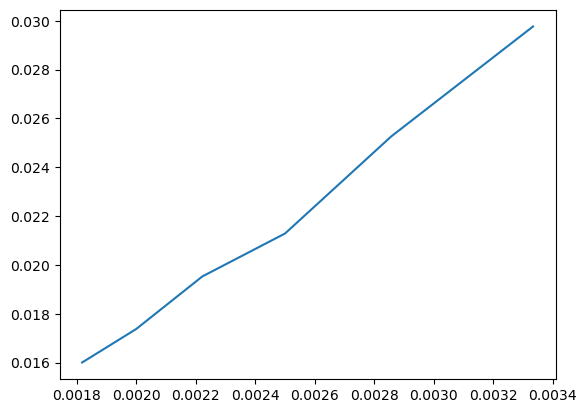

In [14]:

A=1/M

plt.plot(A,E)

In [15]:
import numpy as np
import matplotlib.pyplot as plt #library for plots
from scipy.interpolate import interp1d


r,sigma,S0,T=0.03,0.2,100,1



n=10000
#M=np.cumprod([2,2,2,2,2,2])

M=np.array([16,32,64,120,256])
print(M)
E=[]
for m in M:




    times=np.linspace(0,T,m)
    #print('T',times)

    dt=times[1]-times[0]
    dB=np.sqrt(dt)*np.random.randn(n,m-1)

    W0=np.zeros((n,1))
    W=np.concatenate((W0,np.cumsum(dB,axis=1)),axis=1)

    #print('W',W)

    X=S0*np.exp((r-(sigma**2)/2)*times+sigma*W)
    #print('X',X)
    Xm1=S0*np.cumprod(1+r*dt+sigma*dB,axis=1)
    print('Xm1',Xm1)
    s0=S0*np.ones((n,1))

    Xm=np.concatenate((s0,Xm1),axis=1)
    print('Xm', Xm)

    Xdiff=(Xm[:,m-1]-X[:,m-1])**2

    print('Xdiff', Xdiff)


    e=np.mean(Xdiff)
    print(e)
    d=np.std(Xdiff)

    E=np.append(E,e)

    
print(E)



[ 16  32  64 120 256]
Xm1 [[ 97.75198268  95.94383601  94.66426861 ...  86.44198118  87.64243888
   91.77892462]
 [ 98.081792   101.89896043 106.022851   ... 107.50753782 118.46208264
  125.97759505]
 [ 99.55027011  95.76037508  91.08445819 ... 104.33708197 104.95719743
  106.83924069]
 ...
 [ 87.44664472  85.76122569  82.58755465 ...  93.66383367  87.13712314
   84.7698327 ]
 [ 99.55598662  95.49409877  99.7567567  ... 112.34599456 105.59073828
  103.60694118]
 [ 96.29915923  94.50101095  98.10788472 ... 112.46391882 112.78213927
  116.44830562]]
Xm [[100.          97.75198268  95.94383601 ...  86.44198118  87.64243888
   91.77892462]
 [100.          98.081792   101.89896043 ... 107.50753782 118.46208264
  125.97759505]
 [100.          99.55027011  95.76037508 ... 104.33708197 104.95719743
  106.83924069]
 ...
 [100.          87.44664472  85.76122569 ...  93.66383367  87.13712314
   84.7698327 ]
 [100.          99.55598662  95.49409877 ... 112.34599456 105.59073828
  103.60694118]
 [1

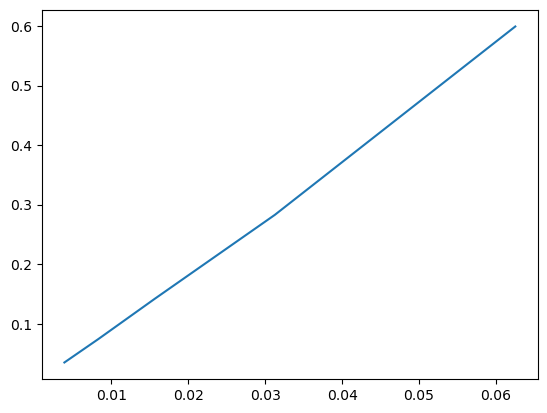

In [16]:

A=1/M

plt.plot(A,E)